In [1]:
import matplotlib.pyplot as plt
import numpy as np
import galois

## Polynomial Interpolation over the Reals
In order to interpolate over the real numbers, `np.polyfit` was used.
This function takes in a set of points and returns the coefficients of the polynomial that interpolates those points.
e.g. `np.polyfit([1, 2, 3], [1, 4, 9], 2)` returns `[1, 0, 0]` which is the polynomial $1x^2 + 0x^1 + 0x^0 = x^2$.

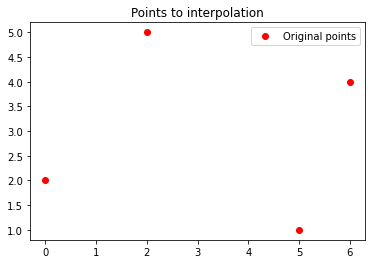

In [2]:
# We will interpolate these points in both the finite field and the reals
y = [2, 5, 1, 4]
x = [0, 2, 5, 6]
plt.title("Points to interpolation")
plt.plot(x, y, 'ro', label='Original points')
plt.legend()
plt.show()

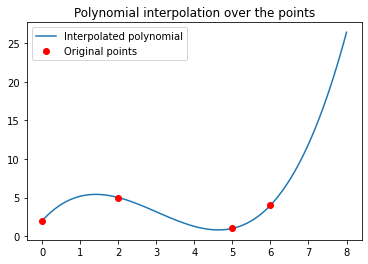

In [3]:
# We will find polynomials that pass through these points using Lagrange interpolation
polyfit_x = np.polyfit(x, y, len(x)-1)

x_vals = np.linspace(0, 8, 100)
y_vals = np.polyval(polyfit_x, x_vals)

plt.title("Polynomial interpolation over the points")
plt.plot(x_vals, y_vals, label='Interpolated polynomial')
plt.plot(x, y, 'ro', label='Original points')
plt.legend()
plt.show()

## Polynomial Interpolation over a Finite Field
In order to interpolate over a finite field, the `galois` library is used with the function `lagrange_poly`. 

Lagrange Polynomial = x^3 + 7x^2 + 7x + 2 [1, 7, 7, 2]


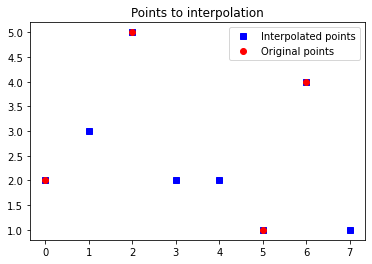

In [4]:
# Initiate a Galois field with 2**3 elements
GF = galois.GF(2**3)

# Convert the original real points to Galois field elements
x_gf = GF(x)
y_gf = GF(y)

# Calculate the Lagrange polynomial
L = galois.lagrange_poly(x_gf, y_gf)
print("Lagrange Polynomial =", L, L.coefficients())

# Evaluate the Lagrange polynomial at each point
x_gf_range = GF.Range(0, 8)
plt.title("Points to interpolation")
plt.plot(x_gf_range, L(x_gf_range), 'bs', label='Interpolated points')
plt.plot(x_gf, y_gf, 'ro', label='Original points')
plt.legend()
plt.show()